In [62]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [63]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [64]:
NUM_CLASSES = 5

# 学習データ読み込み

In [65]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [66]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [68]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [69]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_6 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                860       
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 55        
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [70]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [71]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [72]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
4/4 [==============================] - 0s 34ms/step - loss: 1.7664 - accuracy: 0.1976 - val_loss: 1.7058 - val_accuracy: 0.1898

Epoch 00001: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 2/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.7186 - accuracy: 0.2463 - val_loss: 1.6805 - val_accuracy: 0.2409

Epoch 00002: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 3/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.6682 - accuracy: 0.2390 - val_loss: 1.6608 - val_accuracy: 0.2409

Epoch 00003: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 4/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.6695 - accuracy: 0.2195 - val_loss: 1.6430 - val_accuracy: 0.2336

Epoch 00004: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.6162 - accuracy: 0.2610 - val_loss: 1.62

Epoch 38/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.3380 - accuracy: 0.4439 - val_loss: 1.3988 - val_accuracy: 0.3796

Epoch 00038: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 39/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.3436 - accuracy: 0.4439 - val_loss: 1.3907 - val_accuracy: 0.3796

Epoch 00039: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 40/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.3497 - accuracy: 0.4049 - val_loss: 1.3804 - val_accuracy: 0.3869

Epoch 00040: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 41/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.3658 - accuracy: 0.3780 - val_loss: 1.3683 - val_accuracy: 0.4015

Epoch 00041: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 42/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.3506 - accuracy: 0.4073 - val_loss: 1

4/4 [==============================] - 0s 8ms/step - loss: 1.1681 - accuracy: 0.4902 - val_loss: 1.1233 - val_accuracy: 0.5036

Epoch 00075: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 76/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.1539 - accuracy: 0.5024 - val_loss: 1.1192 - val_accuracy: 0.4964

Epoch 00076: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 77/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.1513 - accuracy: 0.5049 - val_loss: 1.1161 - val_accuracy: 0.5255

Epoch 00077: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 78/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.1664 - accuracy: 0.5000 - val_loss: 1.1131 - val_accuracy: 0.5182

Epoch 00078: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 79/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.1205 - accuracy: 0.4951 - val_loss: 1.1094 - val_

Epoch 112/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0859 - accuracy: 0.5073 - val_loss: 0.9544 - val_accuracy: 0.6423

Epoch 00112: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 113/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.0409 - accuracy: 0.5415 - val_loss: 0.9510 - val_accuracy: 0.6423

Epoch 00113: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 114/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.0630 - accuracy: 0.5463 - val_loss: 0.9473 - val_accuracy: 0.6496

Epoch 00114: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 115/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0530 - accuracy: 0.5537 - val_loss: 0.9448 - val_accuracy: 0.6496

Epoch 00115: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 116/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.0233 - accuracy: 0.5561 - val_lo

4/4 [==============================] - 0s 8ms/step - loss: 1.0008 - accuracy: 0.5585 - val_loss: 0.8540 - val_accuracy: 0.6642

Epoch 00149: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 150/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.9760 - accuracy: 0.5878 - val_loss: 0.8512 - val_accuracy: 0.6788

Epoch 00150: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 151/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9667 - accuracy: 0.6049 - val_loss: 0.8488 - val_accuracy: 0.6788

Epoch 00151: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 152/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.0176 - accuracy: 0.5463 - val_loss: 0.8478 - val_accuracy: 0.7007

Epoch 00152: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 153/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.9563 - accuracy: 0.5878 - val_loss: 0.8480 - va

Epoch 186/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9277 - accuracy: 0.6098 - val_loss: 0.7857 - val_accuracy: 0.7153

Epoch 00186: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 187/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.9070 - accuracy: 0.5780 - val_loss: 0.7819 - val_accuracy: 0.7226

Epoch 00187: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 188/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.8980 - accuracy: 0.6073 - val_loss: 0.7783 - val_accuracy: 0.7226

Epoch 00188: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 189/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.9361 - accuracy: 0.5951 - val_loss: 0.7772 - val_accuracy: 0.7299

Epoch 00189: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 190/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9361 - accuracy: 0.5707 - val_l

Epoch 223/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.9087 - accuracy: 0.6171 - val_loss: 0.7354 - val_accuracy: 0.7080

Epoch 00223: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 224/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.9161 - accuracy: 0.6293 - val_loss: 0.7369 - val_accuracy: 0.7080

Epoch 00224: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 225/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.8826 - accuracy: 0.6366 - val_loss: 0.7403 - val_accuracy: 0.7080

Epoch 00225: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 226/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.8776 - accuracy: 0.6073 - val_loss: 0.7428 - val_accuracy: 0.7080

Epoch 00226: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 227/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.8751 - accuracy: 0.6341 - val_

Epoch 260/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7942 - accuracy: 0.6610 - val_loss: 0.7011 - val_accuracy: 0.7664

Epoch 00260: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 261/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.8592 - accuracy: 0.6195 - val_loss: 0.6995 - val_accuracy: 0.7664

Epoch 00261: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 262/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.8866 - accuracy: 0.6220 - val_loss: 0.6964 - val_accuracy: 0.7664

Epoch 00262: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 263/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.8630 - accuracy: 0.6073 - val_loss: 0.6936 - val_accuracy: 0.7664

Epoch 00263: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 264/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.8513 - accuracy: 0.6439 - val_lo


Epoch 00296: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 297/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.8104 - accuracy: 0.6415 - val_loss: 0.6765 - val_accuracy: 0.7372

Epoch 00297: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 298/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.8334 - accuracy: 0.6390 - val_loss: 0.6736 - val_accuracy: 0.7299

Epoch 00298: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 299/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.8149 - accuracy: 0.6439 - val_loss: 0.6703 - val_accuracy: 0.7226

Epoch 00299: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 300/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7931 - accuracy: 0.6488 - val_loss: 0.6687 - val_accuracy: 0.7226

Epoch 00300: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 301/1000
4/4 [======

4/4 [==============================] - 0s 8ms/step - loss: 0.8125 - accuracy: 0.6634 - val_loss: 0.6440 - val_accuracy: 0.7445

Epoch 00333: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 334/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.8811 - accuracy: 0.6098 - val_loss: 0.6422 - val_accuracy: 0.7372

Epoch 00334: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 335/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.7827 - accuracy: 0.6659 - val_loss: 0.6422 - val_accuracy: 0.7591

Epoch 00335: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 336/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.8676 - accuracy: 0.6293 - val_loss: 0.6433 - val_accuracy: 0.7664

Epoch 00336: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 337/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.8282 - accuracy: 0.6561 - val_loss: 0.6461 - va

Epoch 370/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7781 - accuracy: 0.6610 - val_loss: 0.6293 - val_accuracy: 0.7737

Epoch 00370: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 371/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7827 - accuracy: 0.6610 - val_loss: 0.6282 - val_accuracy: 0.7883

Epoch 00371: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 372/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.7781 - accuracy: 0.6805 - val_loss: 0.6266 - val_accuracy: 0.7883

Epoch 00372: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 373/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.8110 - accuracy: 0.6390 - val_loss: 0.6254 - val_accuracy: 0.7883

Epoch 00373: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 374/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.7811 - accuracy: 0.6780 - val_lo

Epoch 407/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.8104 - accuracy: 0.6244 - val_loss: 0.6063 - val_accuracy: 0.7737

Epoch 00407: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 408/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.7588 - accuracy: 0.6488 - val_loss: 0.6081 - val_accuracy: 0.7664

Epoch 00408: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 409/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7696 - accuracy: 0.6707 - val_loss: 0.6085 - val_accuracy: 0.7591

Epoch 00409: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 410/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7320 - accuracy: 0.6976 - val_loss: 0.6082 - val_accuracy: 0.7518

Epoch 00410: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 411/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.7614 - accuracy: 0.6707 - val_lo


Epoch 00443: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 444/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7618 - accuracy: 0.6878 - val_loss: 0.5934 - val_accuracy: 0.7737

Epoch 00444: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 445/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.7450 - accuracy: 0.6683 - val_loss: 0.5940 - val_accuracy: 0.7883

Epoch 00445: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 446/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.7914 - accuracy: 0.6317 - val_loss: 0.5950 - val_accuracy: 0.7810

Epoch 00446: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 447/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.7814 - accuracy: 0.6488 - val_loss: 0.5967 - val_accuracy: 0.7810

Epoch 00447: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 448/1000
4/4 [=======

4/4 [==============================] - 0s 9ms/step - loss: 0.7145 - accuracy: 0.6561 - val_loss: 0.5751 - val_accuracy: 0.7883

Epoch 00480: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 481/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.7962 - accuracy: 0.6683 - val_loss: 0.5726 - val_accuracy: 0.7883

Epoch 00481: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 482/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.7660 - accuracy: 0.6854 - val_loss: 0.5729 - val_accuracy: 0.7810

Epoch 00482: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 483/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7265 - accuracy: 0.6732 - val_loss: 0.5727 - val_accuracy: 0.7810

Epoch 00483: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 484/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7420 - accuracy: 0.6756 - val_loss: 0.5738 - va

In [73]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7810


In [74]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [75]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.03771936 0.45684454 0.08704585 0.41580233 0.00258791]
1


# 混同行列

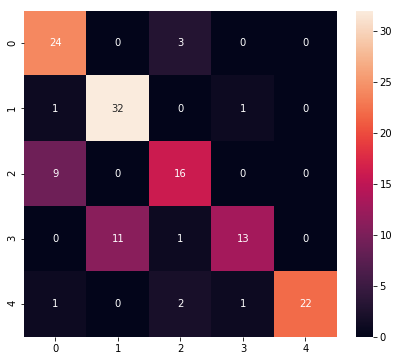

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.89      0.77        27
           1       0.74      0.94      0.83        34
           2       0.73      0.64      0.68        25
           3       0.87      0.52      0.65        25
           4       1.00      0.85      0.92        26

    accuracy                           0.78       137
   macro avg       0.80      0.77      0.77       137
weighted avg       0.80      0.78      0.78       137



In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [77]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [78]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp3zyud4hm/assets


INFO:tensorflow:Assets written to: /tmp/tmp3zyud4hm/assets


6432

# 推論テスト

In [79]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [80]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [81]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [82]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 315 µs, sys: 22 µs, total: 337 µs
Wall time: 270 µs


In [83]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.03771935 0.4568446  0.08704585 0.4158023  0.00258791]
1
